# <span style="color: #59c1cd">Welcome to Anidata!</span> <img style="float: right; height: 150px; margin: 25px" src="https://archive.ics.uci.edu/ml/assets/MLimages/Large53.jpg">
This introduction to machine learning is for complete beginners. 

In this tutorial, you will use machine learning techniques to classify Iris plants into 3 species.  To give yourself context, you could imagine that you are the lead researcher on a project to study Irises.  Your assistants will make measurements of various characteristics of the plant, and you want to develop a model that will identify the species of each set of collected measurements.  To do this, you will use 150 pieces of pre-measured data to train your model.  Then, you will use your model to classify any new data that comes in.

Let's get started!

### <span style="color: #6fb800">Step 0: Import libraries</span>
When working with data, we will be building upon the work of others.  Instead of writing all our own code from scratch, we will be re-using code that others have written.  This code is [open-sourced](https://en.wikipedia.org/wiki/Open-source_software) and stored in coherent groups called libraries. This tutorial will use some common data-analysis libraries: 
- [pandas](http://pandas.pydata.org/) - contains data analysis tools and a convenient data structure
- [matplotlib](https://matplotlib.org/index.html) - tools for plotting data, especially using the sub-library [pyplot](https://matplotlib.org/api/pyplot_api.html) 

In [21]:
# These libraries should already be downloaded into your environment.  We now need to load them into python.
import pandas
import matplotlib.pyplot as plt # the last part sets a shortcut instead of writing out the full library name each time

### <span style="color: #6fb800">Step 1: Get the data</span>
To begin, we will need to import our data into this Jupyter notebook. This tutorial will use the [Iris](https://archive.ics.uci.edu/ml/datasets/iris) dataset from UCI's Machine Learning Repository.  The Iris dataset is [well-known](https://en.wikipedia.org/wiki/Iris_flower_data_set) and was used in a classic 1936 paper by R.A. Fischer. It is often used to get started with machine learning. 

In [22]:
# Read the file directly from the website
iris = pandas.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None) #load the dataset

### <span style="color: #6fb800">Step 2: Get to know the data</span><img style="float: right; height: 150px; margin: 25px" src="https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg">
The [UCI repository](https://archive.ics.uci.edu/ml/datasets/iris) gives information on what is included in the dataset.  In this case, there are 5 attribues that are measured:

- Sepal length in centimeters
- Sepal width in centimeters
- Petal length in centimeters
- Petal width in centimeters
- Species (one of [Iris Setosa](https://en.wikipedia.org/wiki/Iris_setosa), [Iris Versicolour](https://en.wikipedia.org/wiki/Iris_versicolor), [Iris Virginica](https://en.wikipedia.org/wiki/Iris_virginica)).

To get a feel for this dataset, we will first rename the columns according to the information supplied by UCI.  Then, we will look at some of its characteristics.

In [23]:
# Rename the columns
iris.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

In [24]:
# Show the first 5 rows from the dataset
iris.head(5) 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
# Show the last 5 rows from the dataset
iris.tail(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [26]:
# Get the size of our dataset
iris.shape

(150, 5)

In [27]:
# Get some overall info about our dataset and what type of data it contains.
iris.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### <span style="color: #6fb800">Step 3: Exploratory data analysis by plotting</span>
Although this step is not strictly necessary, plotting your data in various ways can be crucial to gaining an understanding of each characteristic of your data.  We will first take a look at how sepal width and length are related for each species in our training data.

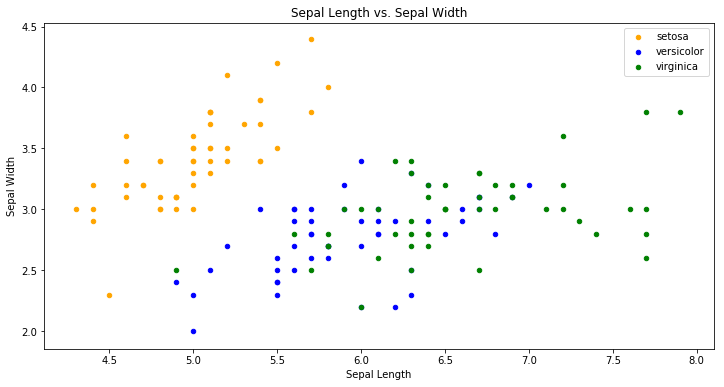

In [28]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length vs. Sepal Width")
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

The above graph shows relationship between the sepal length and width.  Already, you can start to see patterns in the data.  As the above plot shows, the species Iris setosa tends to have low sepal length and high sepal width. Now we will check relationship between the petal length and width.

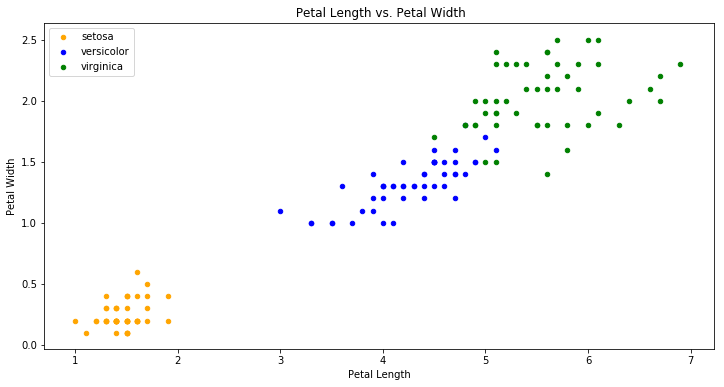

In [29]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length vs. Petal Width")
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Again, we can see patterns in the data.  It seems that petal features do much better than sepal features in clustering the data. This knowledge will be useful when building our model.

### <span style="color: #6fb800">Step 4: Build our model</span>
The problem we are given is a classification problem which will be ultimately used to classify new data.  To build our model, we will use our training set of 150 measurements.  Our model will be built out of the various attributes (sepal length, sepal width, petal length, and petal width).  These will be the inputs to our model.  Our model will then output the species.

In [30]:
inputs = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
outputs = iris['Species']

To build our model we will be using an algorithm called [k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).  It's one of the simplest machine learning algorithms but will be sufficient for this tutorial. As mentioned previously, we will not be coding this from scratch but instead will use the powerful [scikit-learn](http://scikit-learn.org/stable/) library that has many valuable machine learning tools.  We first need to import this library.  

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #for checking the model accuracy

As the name suggests, the k-nearest neighbors (kNN) algorithm works by looking at other points that are 'near by' to determine which species to assign.  (To see how it works, check out this [video](https://www.youtube.com/watch?v=UqYde-LULfs).)  For our first model, we are going to use k = 3 to look at the 3 nearest neighbors.

In [49]:
model = KNeighborsClassifier(n_neighbors=3) # store our model type
model.fit(inputs,outputs) # use our iris data to build our model
prediction = model.predict(inputs) # check our model's accuracy on our own iris data set
print('The accuracy of the KNN is', metrics.accuracy_score(prediction,outputs))

The accuracy of the KNN is 0.96


As you can see, the model was able to predict our iris dataset's species with 96% accuracy.  It is not good practice to judge a model's viability based solely on training data, but given the introductory nature of this tutorial, it will be good enough for our purposes.  Let's take a look at which pieces of data were not predicted accurately.

In [50]:
iris2 = pandas.concat([iris,pandas.DataFrame(prediction,columns=["PredictedSpecies"])],axis=1)
iris2[prediction != outputs]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PredictedSpecies
70,5.9,3.2,4.8,1.8,Iris-versicolor,Iris-virginica
72,6.3,2.5,4.9,1.5,Iris-versicolor,Iris-virginica
83,6.0,2.7,5.1,1.6,Iris-versicolor,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica,Iris-versicolor
119,6.0,2.2,5.0,1.5,Iris-virginica,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica,Iris-versicolor


These 6 pieces of data have their species picked incorrectly.  Let's see if we can improve our model's accuracy.  Our k-nearest neighbors algorithm has a parameter that we can vary, k.  By changing k, we can often improve our model's ability to accurately predict the species of our training data.  We will apply the same algorithm with k = 5, 7, and 10.

In [43]:
model = KNeighborsClassifier(n_neighbors=5) # store our model type
model.fit(inputs,outputs) # use our iris data to build our model
prediction = model.predict(inputs) # check our model's accuracy on our own iris data set
print('The accuracy of the KNN is', metrics.accuracy_score(prediction,outputs))

The accuracy of the KNN is 0.966666666667


In [45]:
model = KNeighborsClassifier(n_neighbors=7) # store our model type
model.fit(inputs,outputs) # use our iris data to build our model
prediction = model.predict(inputs) # check our model's accuracy on our own iris data set
print('The accuracy of the KNN is', metrics.accuracy_score(prediction,outputs))

The accuracy of the KNN is 0.973333333333


In [47]:
model = KNeighborsClassifier(n_neighbors=10) # store our model type
model.fit(inputs,outputs) # use our iris data to build our model
prediction = model.predict(inputs) # check our model's accuracy on our own iris data set
print('The accuracy of the KNN is', metrics.accuracy_score(prediction,outputs))

The accuracy of the KNN is 0.98


It seems like increasing k was a good decision, but be careful!  Our goal is to predict new data - not to accurately predict our training data.  As we increase k, we are increasing our bias.  To understand more, check out [this excellent article](http://scott.fortmann-roe.com/docs/BiasVariance.html).

### <span style="color: #6fb800">Step 5: Use our model to make predictions</span>

Some new data has been collected!  

In [51]:
new = pandas.read_csv("https://raw.githubusercontent.com/gwpjp/Teaching/master/new_data.csv")
new.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,6.5,2.4,5.6,1.8
1,3.9,2.3,3.8,1.7
2,5.6,1.4,3.6,1.3
3,6.9,3.1,4.1,1.4
4,4.3,4.3,1.7,0.2
5,6.5,3.0,4.3,1.9
6,7.4,3.5,4.4,1.5
7,6.5,3.5,5.7,1.5
8,7.4,3.1,5.3,1.5
9,5.7,2.3,5.4,2.0


We will now use our model to predict the species for this new data.  We will use our latest model with k = 10.

In [38]:
predictNew = model.predict(new)
print(predictNew)

['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica']


In [39]:
new2 = pandas.concat([new,pandas.DataFrame(predictNew,columns=["Species"])],axis=1)
print(new2)

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
0             6.5           2.4            5.6           1.8   Iris-virginica
1             3.9           2.3            3.8           1.7  Iris-versicolor
2             5.6           1.4            3.6           1.3  Iris-versicolor
3             6.9           3.1            4.1           1.4  Iris-versicolor
4             4.3           4.3            1.7           0.2      Iris-setosa
5             6.5           3.0            4.3           1.9  Iris-versicolor
6             7.4           3.5            4.4           1.5  Iris-versicolor
7             6.5           3.5            5.7           1.5   Iris-virginica
8             7.4           3.1            5.3           1.5  Iris-versicolor
9             5.7           2.3            5.4           2.0   Iris-virginica
10            7.1           2.7            3.9           1.3  Iris-versicolor
11            5.1           3.2            4.7           1.5  Ir

### <span style="color: #6fb800">Congratulations!</span>
You have built a model using machine learning, and you used it to make predictions on new data.  If you want to continue working with the Iris dataset, it's possible to try some improvements.  Here are some possibilites:
- As we saw earlier, petal features seemed to be much better at clustering the data than sepal features.  Can you build a more accurate model using the k-nearest neighbors algorithm using only these features? 

- There are other machine learning algorithms in the sci-kit learn library.  [Support vector machines](https://en.wikipedia.org/wiki/Support_vector_machine) (SVM) is another common machine learning algorithm.  Try applying it to the Iris dataset to see if you can improve your model.  The code for this is below.  How do these prediction of the species of the new dataset differ from your previous predictions?

In [52]:
from sklearn import svm  
modelSVM = svm.SVC() # store our new model type
modelSVM.fit(inputs,outputs) 
predictionSVM = modelSVM.predict(inputs) 
print('The accuracy of the KNN is', metrics.accuracy_score(predictionSVM,outputs))

The accuracy of the KNN is 0.986666666667


- Repeat the previous step with another machine learning algorithm: [logistic regression](https://en.wikipedia.org/wiki/Logistic_regression).  The algorithm is also [available](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) in sci-kit learn. 

### <span style="color: #6fb800">Where to go next?</span>

These classification problems make great challenges to practice your data science skills.  [Kaggle](https://www.kaggle.com/competitions) hosts data science competitions where you can not only practice your skills but also compete to win money.  Some of the prizes for winning a competition are over a million dollars!  Some competitions can be overwhelming to get started on.  We recommend that you try these competitions as your next step:

- [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic) - This competition, albeit a bit morbid, asks you to build a model to predict what type of passengers survived the Titanic's sinking.  If you want some help getting started, [here](https://www.kaggle.com/startupsci/titanic-data-science-solutions) is a tutorial to get you started.
- [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer) - This competition introduces you to computer vision as you take a dataset collected from hand-written numbers.  Your goal is to identify the digit that was written.  Again, it may help to check out one of the [kernels](https://www.kaggle.com/c/digit-recognizer/kernels?sortBy=votes&language=Python&after=false) that other people have written to guide you along your way.

### <span style="color: #6fb800">Good luck!</span>
